# Employment access

Estimate access to employment within a 30 min walking radious for the Mind-The-Gap Index.

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Download data

### Municipality boundaries

In [2]:
mun_schema = 'metropolis'
mun_folder = 'metro_list'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


### Nodes, edges and Graph

In [3]:
mun_gdf = mun_gdf.set_crs("EPSG:4326")

G,nodes,edges = aup.graph_from_hippo(mun_gdf, schema='osmnx', 
                    edges_folder='edges_speed', nodes_folder='nodes_elevation')

In [4]:
print(nodes.shape)
nodes.head(4)

(195754, 6)


,index,x,y,street_count,elevation,geometry
osmid,,,,,,
28751344,0,-103.306309,20.711533,3.0,1548.0,POINT (-103.30631 20.71153)
28753224,1,-103.316645,20.700650,3.0,1530.0,POINT (-103.31665 20.70065)
28757751,2,-103.307356,20.708526,3.0,1548.0,POINT (-103.30736 20.70853)
28757777,3,-103.306806,20.710093,4.0,1548.0,POINT (-103.30681 20.71009)


In [5]:
print(edges.shape)
edges.head(4)

(469334, 19)


osmid  oneway lanes              name  \
u          v          key                                              
1677125182 6828664581 0    481701777   False  None    Calle Iturbide   
           1785633323 0    155311958   False  None  Calle Cuauhtémoc   
           1677125262 0    481701777   False  None    Calle Iturbide   
6828664581 1677125182 0    481701777   False  None    Calle Iturbide   

                               highway  length  \
u          v          key                        
1677125182 6828664581 0    residential  34.569   
           1785633323 0    residential  70.094   
           1677125262 0    residential  49.880   
6828664581 1677125182 0    residential  34.569   

                                                                    geometry  \
u          v          key                                                      
1677125182 6828664581 0    LINESTRING (-103.26683 20.62524, -103.26691 20...   
           1785633323 0    LINESTRING (-103.26683 20.62524, -103.26617 20...   
           1677125262 0    LINESTRING (-103.26683 20.62524, -103.26674 20...   
6828664581 1677125182 0    LINESTRING (-103.26691 20.62494, -103.26683 20...   

                           grade  grade_abs access tunnel   ref maxspeed  \
u          v          key                                                  
1677125182 6828664581 0    0.000      0.000   None   None  None     None   
           1785633323 0    0.043      0.043   None   None  None     None   
           1677125262 0   -0.020      0.020   None   None  None     None   
6828664581 1677125182 0    0.000      0.000   None   None  None     None   

                          bridge junction service width  walkspeed  time_min  
u          v          key                                                     
1677125182 6828664581 0     None     None    None  None   4.000000  0.518535  
           1785633323 0     None     None    None  None   3.441111  1.222175  
           1677125262 0     None     None    None  None   3.729575  0.802451  
6828664581 1677125182 0     None     None    None  None   4.000000  0.518535

## Calculate isochrone

In [36]:
osmid = 28751344
iso_geom = aup.calculate_isochrone(G, osmid, 30, dist_column='time_min')

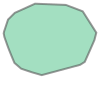

In [18]:
iso_geom

## Download DENUE

In [20]:
folder_denue = 'denue'
table_denue = 'denue_2020'

query = f"SELECT * FROM {folder_denue}.{table_denue} WHERE ST_Intersects(geometry, \'SRID=4326;{iso_geom}\')"

denue = aup.gdf_from_query(query, geometry_col='geometry')

In [23]:
print(denue.shape)
denue.head(4)

(3427, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,6146501.0,"CONSTRUCTORA 501, SA DE CV",CONSTRUCTORA 501 SA DE CV,236221.0,Edificación de inmuebles comerciales y de serv...,11 a 30 personas,CALLE,ANDRUS ARROYO DE ANDA,PRIVADA,NINGUNO,...,3020,3.0,nan,None,None,Fijo,20.716187,-103.30185,2010-07,POINT (-103.30185 20.71619)
1,1659342.0,BODEGA DE INSTALACION DE CERCA DE ALTO VOLTAJE...,None,238990.0,Otros trabajos especializados para la construc...,0 a 5 personas,CALLE,IGUALDAD,CALLE,MONTES URALES,...,0204,5.0,3315809891.0,None,None,Fijo,20.709557,-103.31857,2010-07,POINT (-103.31857 20.70956)
2,6146215.0,"CONSTRUCCIONES VTR3, SA DE CV",CONSTRUCCIONES VTR3 SA DE CV,237312.0,"Construcción de carreteras, puentes y similares",6 a 10 personas,CALLE,JUSTICIA,CALLE,MONTE EVEREST,...,0191,23.0,nan,CONSVTR3@PRODIGY.NET.MX,None,Fijo,20.712486,-103.31969,2010-07,POINT (-103.31969 20.71249)
3,1679326.0,EDUARDO MAGALLANES RUBIO,,238210.0,Instalaciones eléctricas en construcciones,11 a 30 personas,CALLE,SAN CLEMENTE,CALLE,BELISARIO DOMÍNGUEZ,...,0223,11.0,nan,None,None,Fijo,20.708360,-103.31250,2010-07,POINT (-103.31250 20.70836)


## Jobs from DENUE

In [6]:
def number_of_jobs(per_ocu):
    jobs_dict = {'0 a 5 personas':3,
                '6 a 10 personas':8,
                '11 a 30 personas':20,
                '31 a 50 personas':40,
                '51 a 100 personas':75,
                '101 a 250 personas':175,
                '251 y más personas':325}
    per_ocu_num = jobs_dict[per_ocu]
    return per_ocu_num

In [31]:
denue['per_ocu_num'] = denue.per_ocu.apply(lambda per_ocu: number_of_jobs(per_ocu))

## Data to nodes

In [35]:
nodes_job = nodes.reset_index()[['osmid','geometry']].copy()
nodes_job.head(2)

,osmid,geometry
0,28751344,POINT (-103.30631 20.71153)
1,28753224,POINT (-103.31665 20.70065)


In [38]:
nodes_job.loc[nodes_job.osmid==osmid, 'denue_count'] = denue.shape[0]
nodes_job.loc[nodes_job.osmid==osmid, 'denue_jobs'] = denue.per_ocu_num.sum()

In [27]:
denue_size_dict = jobs_dict = {'denue_0_5':'0 a 5 personas',
                'denue_6_10':'6 a 10 personas',
                'denue_11_30':'11 a 30 personas',
                'denue_31_50':'31 a 50 personas',
                'denue_51_100':'51 a 100 personas',
                'denue_101_250':'101 a 250 personas',
                'denue_250_mas':'251 y más personas'}

In [40]:
for denue_size in denue_size_dict.keys():
    nodes_job.loc[nodes_job.osmid==osmid, denue_size] = denue.loc[denue.per_ocu==denue_size_dict[denue_size]].shape[0]

In [41]:
nodes_job.loc[nodes_job.osmid==osmid]

,osmid,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas
0,28751344,POINT (-103.30631 20.71153),3427.0,17953.0,3037.0,189.0,159.0,20.0,11.0,7.0,4.0


## Nodes analysis pipeline

In [7]:
from tqdm import tqdm

In [8]:
folder_denue = 'denue'
table_denue = 'denue_2020'

osmid_isochrone = {}

nodes_job = nodes.reset_index()[['osmid','geometry']].copy()

# idx = nodes_job.denue_count.isna()

# osmid_list = nodes_job.loc[idx].osmid.to_list()

for i in tqdm(range(len(nodes_job)), position=0, leave=True):
    osmid = nodes_job.iloc[i].osmid
    # create isochrone
    iso_geom = aup.calculate_isochrone(G, osmid, 30, dist_column='time_min')
    
    osmid_isochrone[osmid] = iso_geom

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195754/195754 [2:58:24<00:00, 18.29it/s]


In [9]:
iso_df = pd.DataFrame.from_dict(osmid_isochrone, orient='index').reset_index().rename(columns={'index':'osmid',0:'geometry'})
print(iso_df.shape)
iso_df.head(4)

(195754, 2)


,osmid,geometry
0,28751344,"POLYGON ((-103.3085567 20.6972379, -103.312141..."
1,28753224,"POLYGON ((-103.3151964 20.6864678, -103.325197..."
2,28757751,"POLYGON ((-103.3080782 20.6944792, -103.309356..."
3,28757777,"POLYGON ((-103.3090265 20.6956042, -103.313046..."


In [10]:
iso_gdf = gpd.GeoDataFrame(
    iso_df, geometry='geometry')
iso_gdf = iso_gdf.set_crs("EPSG:4326")

In [12]:
gdf_tmp = iso_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.set_geometry('geometry')
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]

In [13]:
# download denue
query = f"SELECT * FROM {folder_denue}.{table_denue} WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"

denue = aup.gdf_from_query(query, geometry_col='geometry')

print(denue.shape)
denue.head(4)

(223492, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,9037647.0,ACUACTIVA,None,312112.0,Purificación y embotellado de agua,0 a 5 personas,CALLE,LOMA DE SAN BARTOLO,CALLE,LOMA DE SAN FERNANDO,...,2717,34.0,3311015515.0,None,None,Fijo,20.487580,-103.404526,2019-11,POINT (-103.40453 20.48758)
1,9037648.0,AGUA SANTA ANITA,None,312112.0,Purificación y embotellado de agua,0 a 5 personas,AVENIDA,LOMA DE VERONA PONIENTE,CALLE,LOMA DE FLORENCIA,...,2685,13.0,3312984699.0,None,None,Fijo,20.490816,-103.406380,2019-11,POINT (-103.40638 20.49082)
2,7862309.0,ELABORACIÓN DE CHOCOLATE Y PRODUCTOS DE CHOCOLATE,None,311350.0,Elaboración de chocolate y productos de chocolate,0 a 5 personas,BOULEVARD,LOMAS DEL SUR,CALLE,LOMA DE SAN LUIS,...,2651,33.0,3315372689.0,DUCMA57@HOTMAIL.COM,None,Fijo,20.492086,-103.400380,2019-11,POINT (-103.40038 20.49209)
3,7311417.0,LONCHERIA Y NEVERIA ALEX,None,311520.0,Elaboración de helados y paletas,0 a 5 personas,CALLE,LAZARO CARDENAS,PRIVADA,DE VELAZQUEZ,...,276A,1.0,nan,None,None,Fijo,20.464120,-103.402590,2019-11,POINT (-103.40259 20.46412)


### Intersect isochrones and denue

In [34]:
def clip_denue(denue, geom, denue_size_dict):
    # clip denue into gdf
    denue_clip = gpd.clip(denue, geom)
        
    # jobs data to nodes
    total_denue = denue_clip.shape[0]
    total_jobs = denue_clip.per_ocu_num.sum()
    
    job_dict = {}
    denue_size_list = []

    for denue_size in denue_size_dict.keys():
        denue_size_list.append(denue_size)
        job_dict[denue_size] = denue_clip.loc[denue_clip.per_ocu==denue_size_dict[denue_size]].shape[0]
    
    return (total_denue, total_jobs, job_dict[denue_size_list[0]],
            job_dict[denue_size_list[1]], job_dict[denue_size_list[2]],
            job_dict[denue_size_list[3]], job_dict[denue_size_list[4]],
            job_dict[denue_size_list[5]], job_dict[denue_size_list[6]])

In [51]:
# calculate jobs
job_analysis_columns = ['denue_count','denue_jobs','denue_0_5','denue_6_10',
                    'denue_11_30','denue_31_50','denue_51_100',
                    'denue_101_250','denue_250_mas']

for i in tqdm(range(len(iso_gdf)), position=0, leave=True):
    
    osmid = iso_gdf.iloc[i].osmid
    geom = iso_gdf.iloc[i].geometry
    
    if geom.geom_type=='Point' or geom.geom_type=='LineString':
        continue

    # create isochrone
    iso_gdf.loc[iso_gdf.osmid==osmid, job_analysis_columns] = clip_denue(denue, geom, denue_size_dict)
    
# iso_gdf[job_analysis_columns] = iso_gdf.geometry.apply(lambda geom: clip_denue(denue, geom, denue_size_dict))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195754/195754 [1:38:27<00:00, 33.14it/s]


In [56]:
iso_gdf

,osmid,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas
0,28751344,"POLYGON ((-103.30856 20.69724, -103.31214 20.6...",3427.0,17953.0,3037.0,189.0,159.0,20.0,11.0,7.0,4.0
1,28753224,"POLYGON ((-103.31520 20.68647, -103.32520 20.6...",4417.0,22039.0,3851.0,302.0,208.0,34.0,16.0,4.0,2.0
2,28757751,"POLYGON ((-103.30808 20.69448, -103.30936 20.6...",3732.0,18865.0,3302.0,218.0,167.0,20.0,16.0,7.0,2.0
3,28757777,"POLYGON ((-103.30903 20.69560, -103.31305 20.6...",3721.0,18705.0,3292.0,218.0,168.0,20.0,14.0,7.0,2.0
4,28768905,"POLYGON ((-103.31102 20.68048, -103.31966 20.6...",5257.0,26661.0,4663.0,324.0,211.0,29.0,16.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
195749,9518278497,"POLYGON ((-103.41090 20.73699, -103.41962 20.7...",1169.0,11153.0,959.0,97.0,78.0,11.0,5.0,7.0,12.0
195750,9523272111,"POLYGON ((-103.53971 20.71506, -103.55504 20.7...",334.0,2662.0,296.0,18.0,14.0,0.0,0.0,4.0,2.0
195751,9523319225,"POLYGON ((-103.19202 20.35853, -103.19729 20.3...",2.0,40.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
195752,9523406805,"POLYGON ((-103.35978 20.70358, -103.36460 20.7...",3251.0,20725.0,2775.0,255.0,158.0,25.0,18.0,11.0,9.0


In [58]:
nodes_job_data = nodes_job.merge(iso_gdf.drop(columns=['geometry']), on='osmid', how='left')
print(nodes_job_data.shape)
nodes_job_data.head(4)

(195754, 11)


,osmid,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas
0,28751344,POINT (-103.30631 20.71153),3427.0,17953.0,3037.0,189.0,159.0,20.0,11.0,7.0,4.0
1,28753224,POINT (-103.31665 20.70065),4417.0,22039.0,3851.0,302.0,208.0,34.0,16.0,4.0,2.0
2,28757751,POINT (-103.30736 20.70853),3732.0,18865.0,3302.0,218.0,167.0,20.0,16.0,7.0,2.0
3,28757777,POINT (-103.30681 20.71009),3721.0,18705.0,3292.0,218.0,168.0,20.0,14.0,7.0,2.0


## Nodes to hex

In [52]:
cvegeo_list = list(mun_gdf.loc[mun_gdf.city==city]["CVEGEO"].unique())

In [55]:
# donwload hexagons with pop data
hex_pop = gpd.GeoDataFrame()
hex_folder = 'hex_bins_pop_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT hex_id_8,pobtot,pea,geometry FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_pop = pd.concat([hex_pop, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_pop.shape)
hex_pop.head(2)

(1187, 4)


,hex_id_8,pobtot,pea,geometry
0,8849abc9ebfffff,273.168550,131.056180,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."
1,8849abc9e3fffff,98.333336,42.333332,"POLYGON ((-103.61374 20.43321, -103.61319 20.4..."


In [72]:
hex_job = aup.group_by_hex_mean(nodes_job_data, hex_pop, 8, 'denue_count')
print(hex_job.shape)
hex_job.head(4)

(1187, 15)


,hex_id_8,pobtot_x,pea_x,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas,pobtot_y,pea_y
0,8849abc9ebfffff,273.168550,131.056180,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",112.520000,753.480000,96.760000,7.600000,4.560000,1.680000,0.920000,1.000000,0.000000,273.168550,131.056180
1,8849abc9e3fffff,98.333336,42.333332,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",40.000000,309.812500,34.062500,2.437500,1.625000,1.000000,0.375000,0.500000,0.000000,98.333336,42.333332
2,8849abc999fffff,60.000000,27.000000,"POLYGON ((-103.64928 20.44809, -103.65381 20.4...",259.444444,1134.407407,246.000000,8.740741,3.111111,0.888889,0.000000,0.000000,0.703704,60.000000,27.000000
3,8849abc9e7fffff,1247.971700,577.124270,"POLYGON ((-103.59961 20.43722, -103.60414 20.4...",456.111111,2407.555556,402.333333,28.888889,16.527778,6.250000,0.722222,0.777778,0.611111,1247.971700,577.124270


<AxesSubplot:>

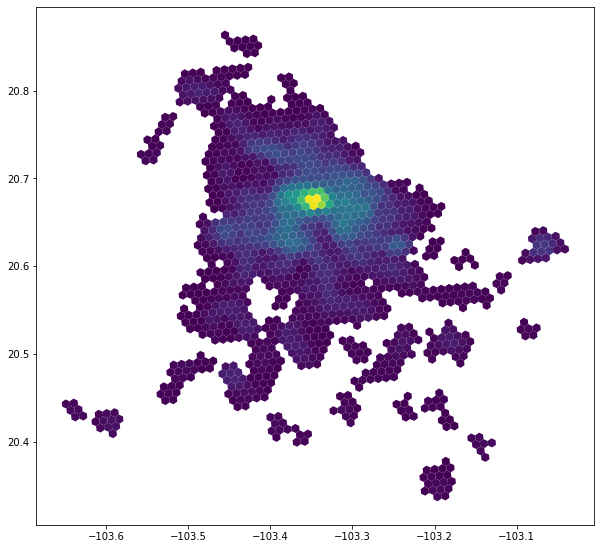

In [73]:
fig,ax = plt.subplots(figsize=(10,10))

hex_job.plot('denue_count', ax=ax)

<AxesSubplot:>

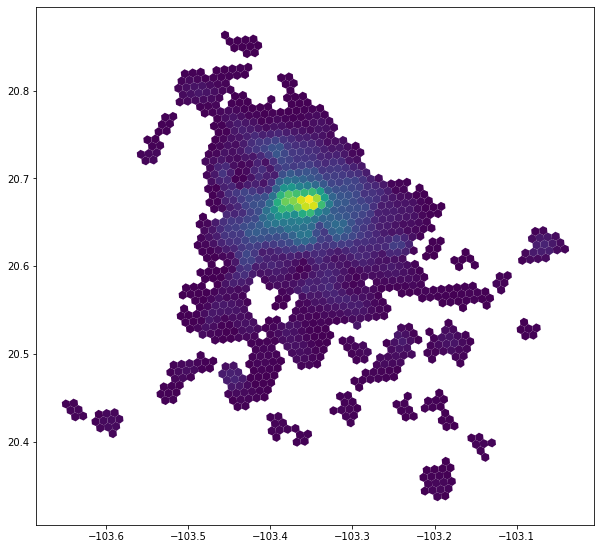

In [74]:
fig,ax = plt.subplots(figsize=(10,10))

hex_job.plot('denue_jobs', ax=ax)

## Save

In [76]:
hex_job.to_file('../../data/processed/mind_the_gap/hex_job_access.geojson')

In [77]:
aup.gdf_to_db_slow(hex_job, 'job_access', 'mind_the_gap')

## Data Analysis

In [78]:
hex_job_access = gpd.read_file('../../data/processed/mind_the_gap/hex_job_access_v2.geojson')
print(hex_job_access.shape)
hex_job_access.head(4)

(1187, 20)


,hex_id_8,pobtot_x,pea_x,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas,pobtot_y,pea_y,job_pea,job-pea,tasa_empleo,empleo_informal,tasa_empleo_informal,geometry
0,8849abc9ebfffff,273.168550,131.056180,112.520000,753.480000,96.760000,7.600000,4.560000,1.680000,0.920000,1.000000,0.000000,273.168550,131.056180,5.749,622.424,0.617012,-39.063108,-0.298064,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."
1,8849abc9e3fffff,98.333336,42.333332,40.000000,309.812500,34.062500,2.437500,1.625000,1.000000,0.375000,0.500000,0.000000,98.333336,42.333332,7.318,267.479,0.622549,-4.690396,-0.110797,"POLYGON ((-103.61374 20.43321, -103.61319 20.4..."
2,8849abc999fffff,60.000000,27.000000,259.444444,1134.407407,246.000000,8.740741,3.111111,0.888889,0.000000,0.000000,0.703704,60.000000,27.000000,42.015,1107.407,0.562500,-10.600000,-0.392593,"POLYGON ((-103.64928 20.44809, -103.65381 20.4..."
3,8849abc9e7fffff,1247.971700,577.124270,456.111111,2407.555556,402.333333,28.888889,16.527778,6.250000,0.722222,0.777778,0.611111,1247.971700,577.124270,4.172,1830.431,0.586327,-188.793477,-0.327128,"POLYGON ((-103.59961 20.43722, -103.60414 20.4..."


In [79]:
import seaborn as sns

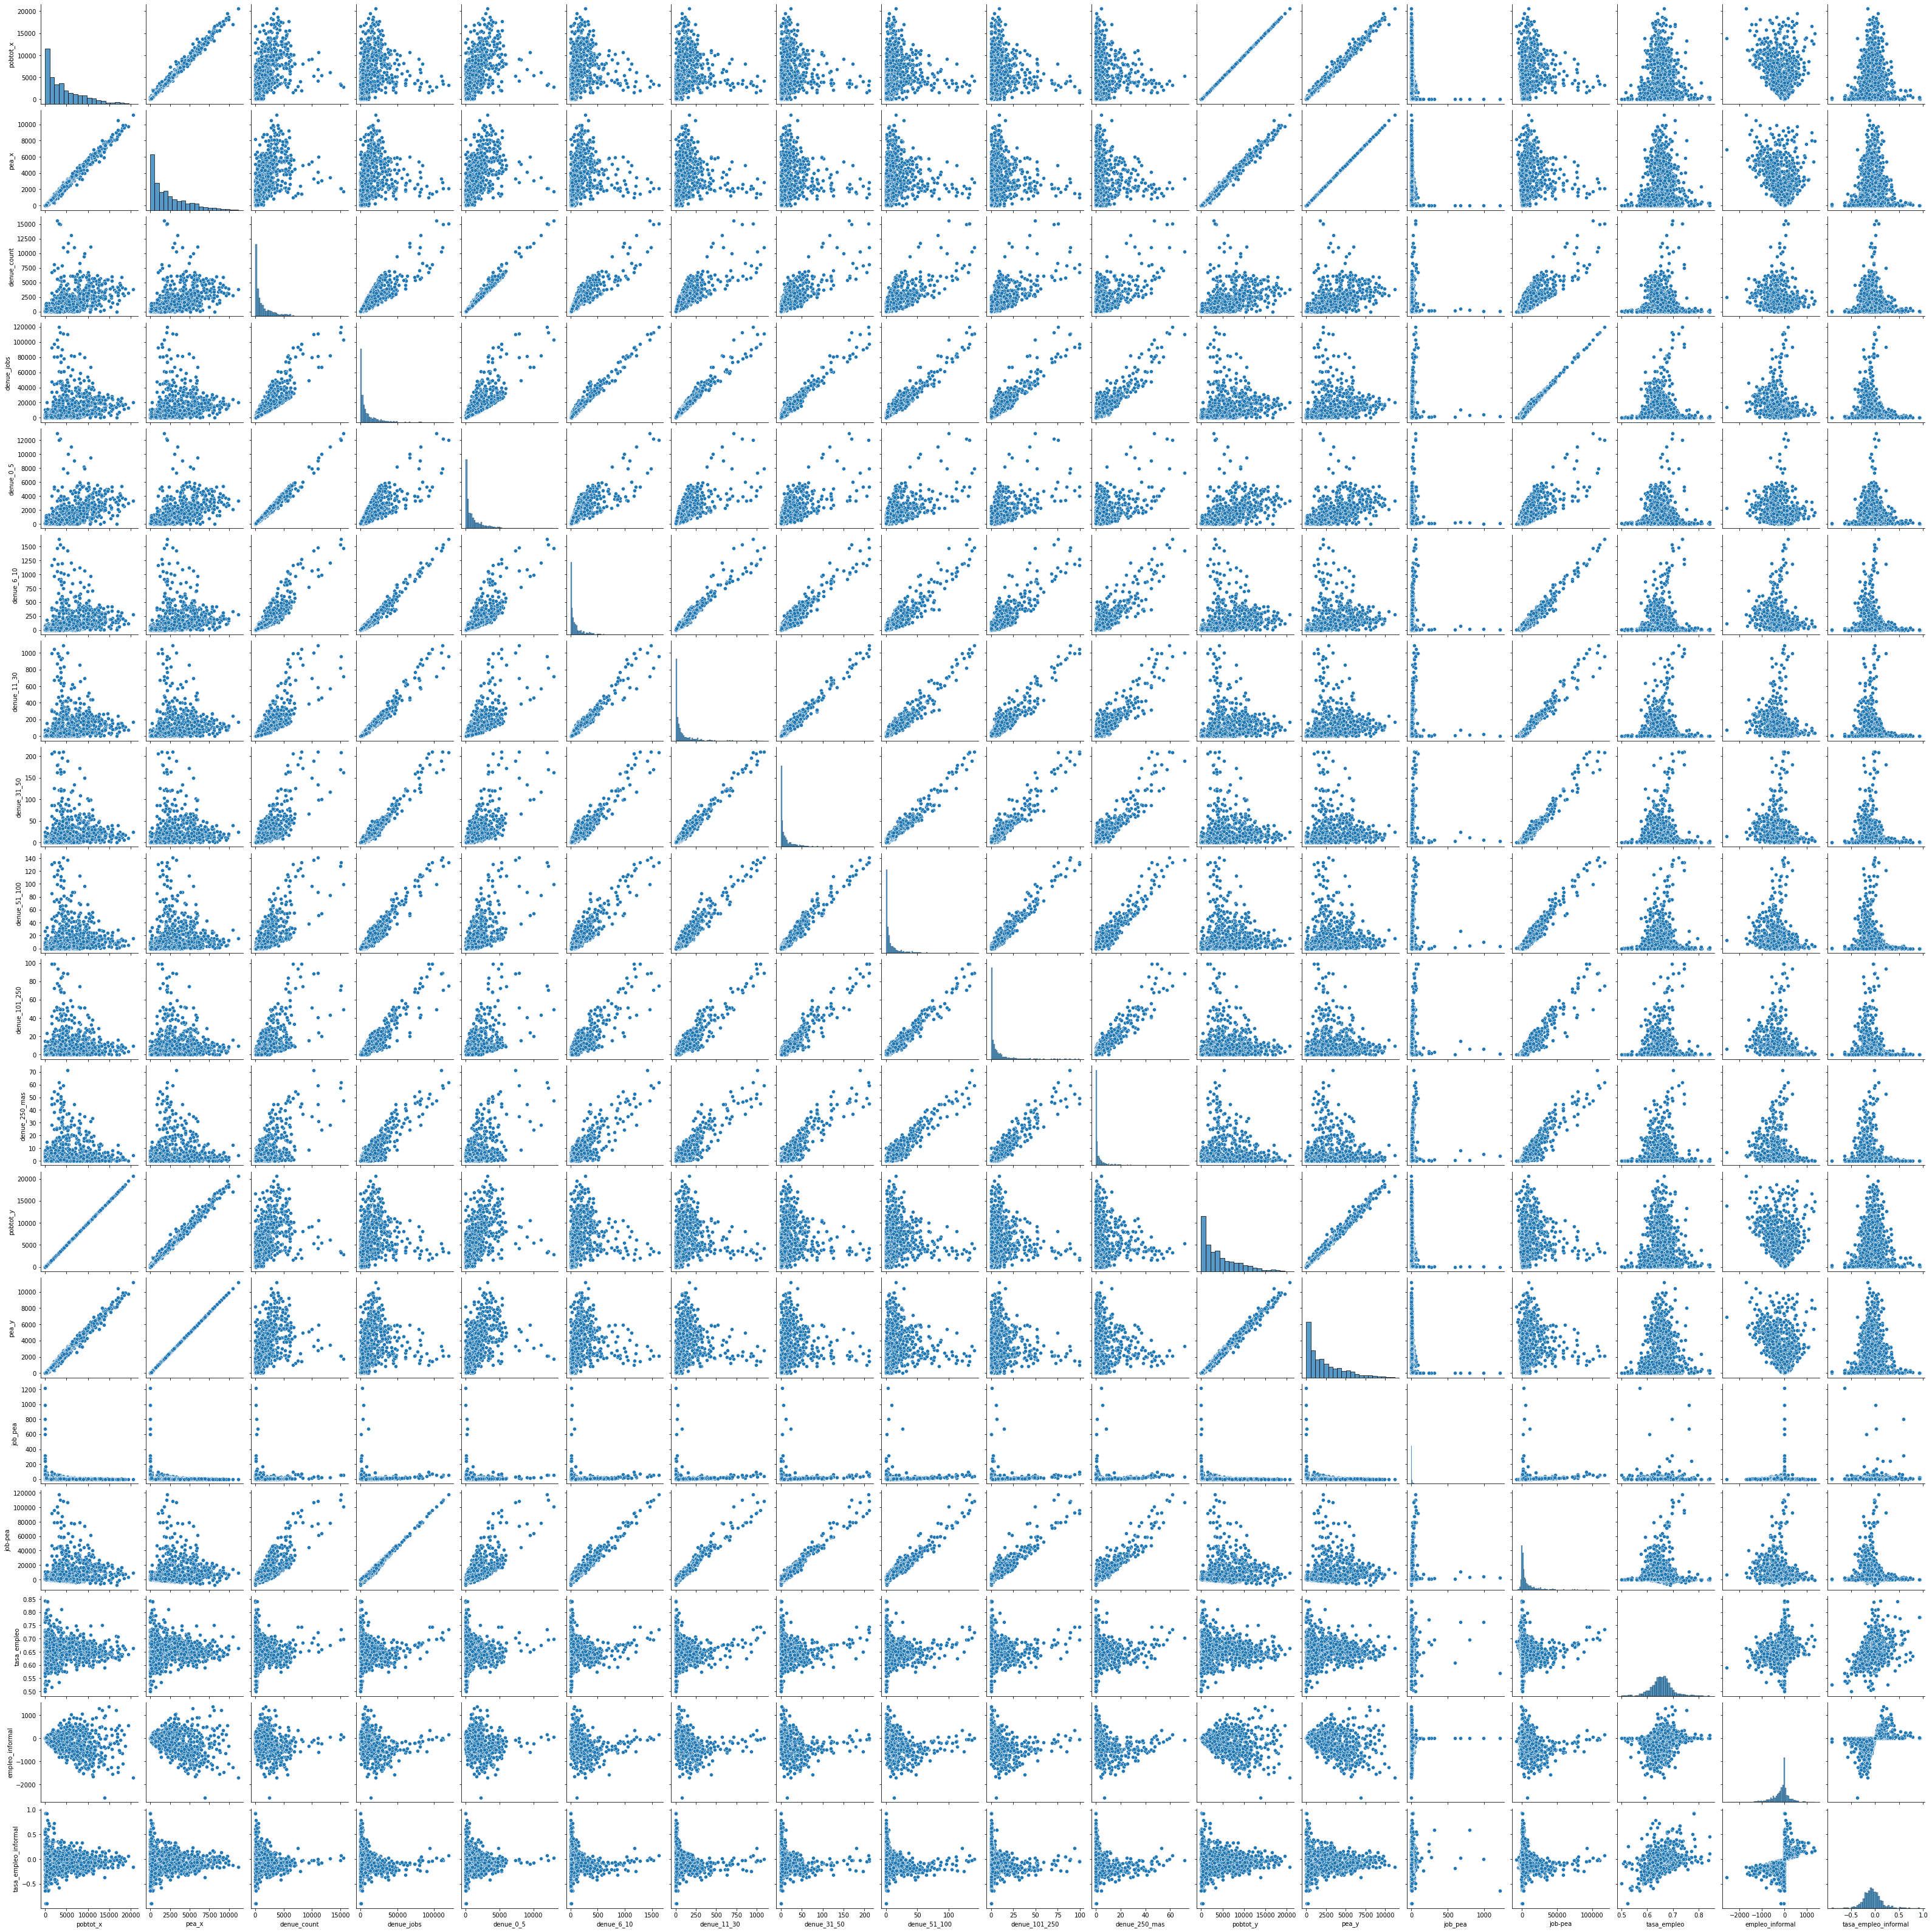

In [80]:
sns.pairplot(hex_job_access)